In [2]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, probplot

In [3]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [4]:

list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

part 1: 1. Using an appropriate visualization, explore how Mean Annual Temperature (Temp_ann) may affect the
presence of Salmo trutta fario (Brown Trout).

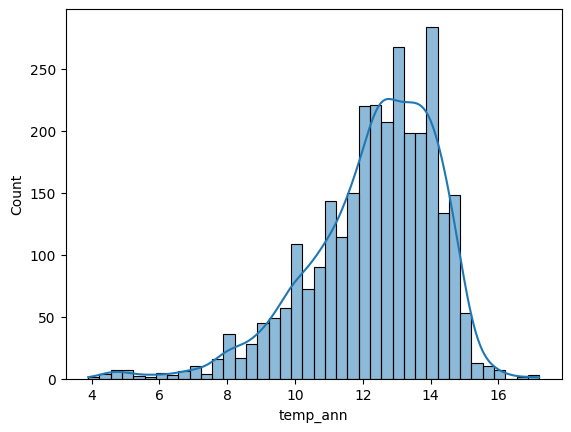

In [6]:
# creating dataframe that only includes samples where Salmo trutta fario is present:
df_Salmao = df[df['Salmo trutta fario'] == 1]

# histogram of the dataframe with temp_ann in the x axis
sns.histplot(data=df_Salmao, x='temp_ann', kde=True)

plt.show()


part 2: Check the same effect but now separately for Minho and in the Tagus catchments and comparing the “effect sizes”.

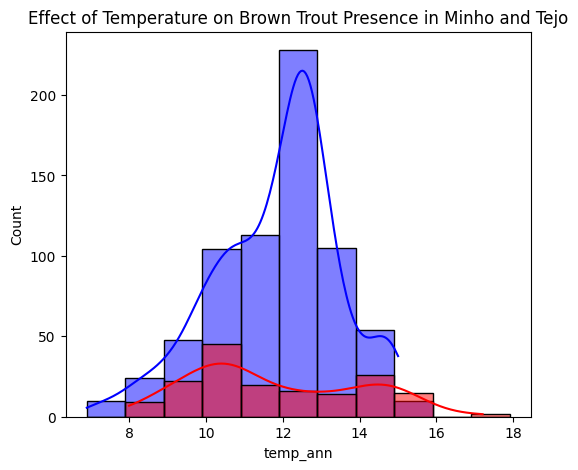

In [7]:
# filter df
df_Minho = df_Salmao[df_Salmao['Catchment_name'] == 'Minho']
df_Tejo = df_Salmao[df_Salmao['Catchment_name'] == 'Tejo']

# Define the bin edges with a step size of 1, covering the range of both datasets
min_value = min(df_Minho['temp_ann'].min(), df_Tejo['temp_ann'].min())
max_value = max(df_Minho['temp_ann'].max(), df_Tejo['temp_ann'].max())

# Create bin edges with a step of 1
bin_edges = np.arange(min_value, max_value + 1, 1)

# create figure for plots
plt.figure(figsize=(6, 5))

# histogram for minho:
sns.histplot(data=df_Minho, x="temp_ann", color='blue', label='Minho', kde=True, bins=bin_edges)

# histogram for tejo:
sns.histplot(data=df_Tejo, x="temp_ann", color='red', label='Tejo', kde=True, bins=bin_edges)

plt.title("Effect of Temperature on Brown Trout Presence in Minho and Tejo")

plt.show()

part 3: 
Test, using both visualization and hypothesis testing methods, if the actual_river_slope is drawn from a normal distribution.

Statistics=0.516, p=2.59e-79
Sample is significantly different from Gaussian (reject H0).


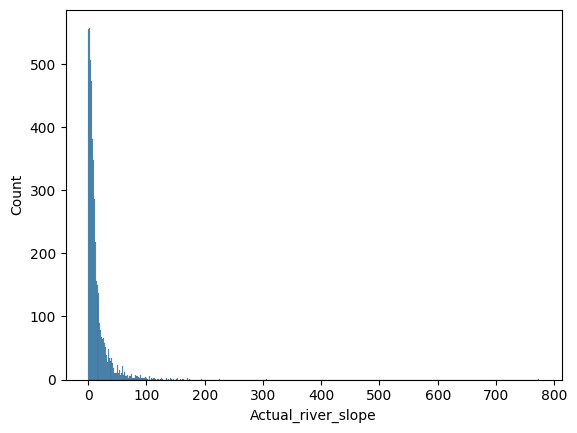

In [8]:
sns.histplot(data=df, x="Actual_river_slope")

# Normality test (Shapiro-Wilk)
stat, p = shapiro(df["Actual_river_slope"].dropna()) 
# Print results
print(f'Statistics={stat:.3f}, p={p:.3}') 

alpha = 0.05
if p > alpha:
    print("Sample is not significantly different from Gaussian (fail to reject H0).")
else:
    print("Sample is significantly different from Gaussian (reject H0).")

part 4:
Take 100 samples of 2000 observations with replacement, compute the mean for each sample and plot the resulting histogram of means. Test if these 100 mean values are drawn from a normal distribution. 

<Figure size 640x480 with 0 Axes>

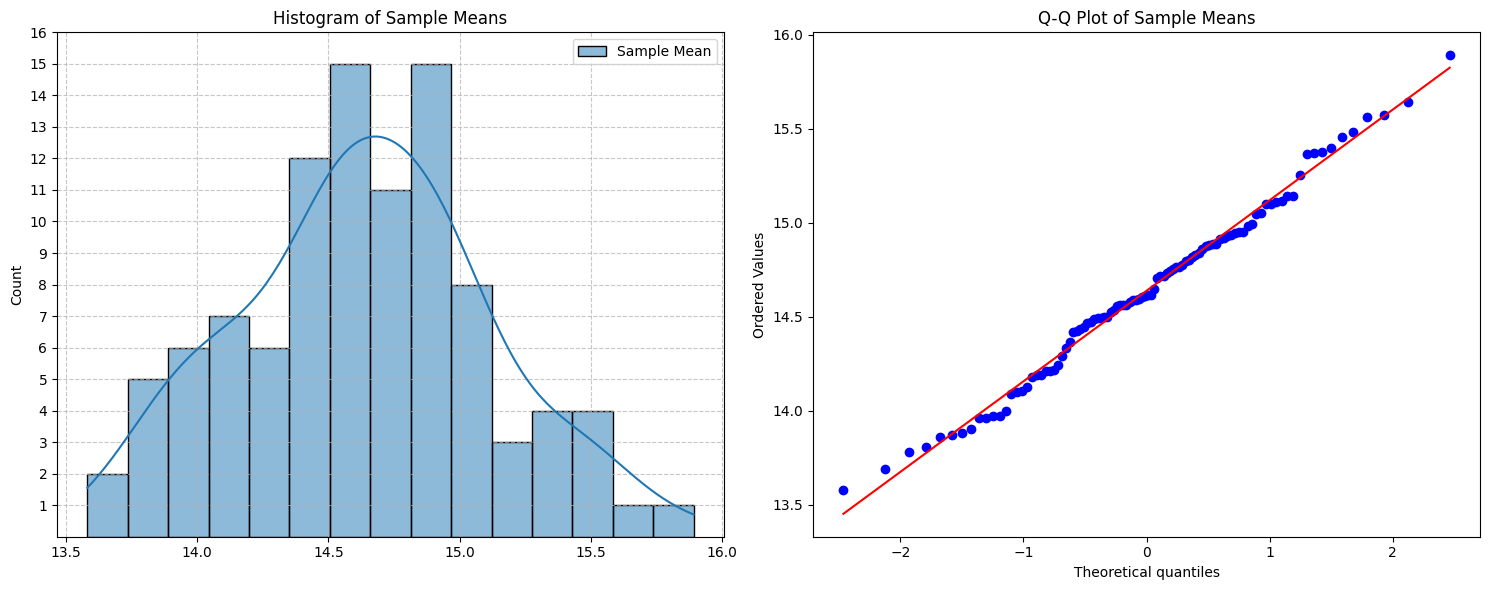

Fail to reject H0; Normal distribution: Shapiro-Wilk Test p-value: 0.683


In [12]:
sample_means = []
num_samples = 100
sample_size = 2000

for _ in range(num_samples):
    sample = np.random.choice(df["Actual_river_slope"].dropna(), size=sample_size, replace=True)
    sample_means.append(np.mean(sample))

plt.tight_layout()
plt.show()

# put samples in a new dataframe
df_means = pd.DataFrame({"Sample Mean": sample_means})

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # creating figure for plot: 1 row, 2 columns

# plot histogram of means
sns.histplot(df_means, bins=15, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Sample Means")
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_yticks(np.arange(1, axes[0].get_ylim()[1] + 1, 1))

# Q-Q plot
probplot(df_means["Sample Mean"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Sample Means")

plt.tight_layout()
plt.show()

# Normality test (Shapiro-Wilk)
shapiro_test = shapiro(df_means["Sample Mean"])
if shapiro_test.pvalue < 0.05:
    print(f"Reject H0; Not a Normal distribution: Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.3f}")
else:
     print(f"Fail to reject H0; Normal distribution: Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.3f}")
